In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score


In [12]:

acc_scorer = make_scorer(accuracy_score)


In [13]:

df = pd.read_csv('./titanic.csv')

df.head()
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:

df.dropna(subset=['Age'], inplace=True)

df.Age = df.Age.astype(int)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [15]:

df.Sex = df.Sex.map({ 'male': 0, 'female': 1 })

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


Text(0, 0.5, '%Survie')

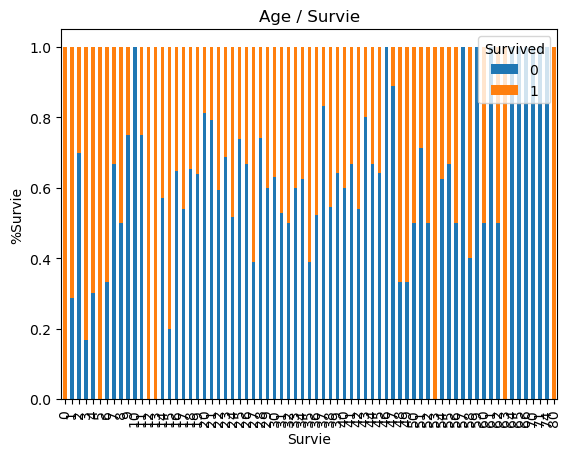

In [16]:

# first sort

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)

table = pd.crosstab(df.Age, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')


In [18]:

df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Text(0, 0.5, '%Survie')

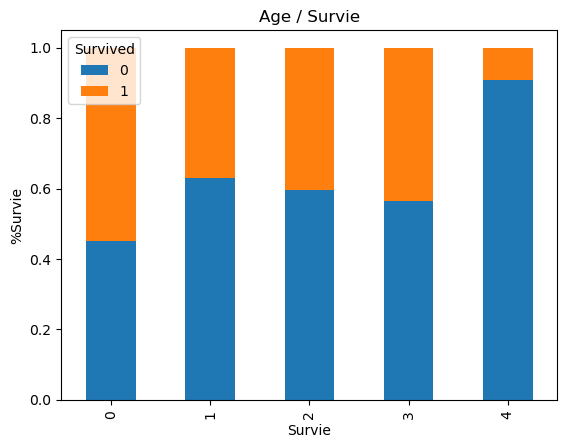

In [19]:

df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[df['Age'] > 64, 'Age'] = 4

df.drop('AgeBand', axis=1, inplace=True)

table = pd.crosstab(df.Age, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')


Text(0, 0.5, '')

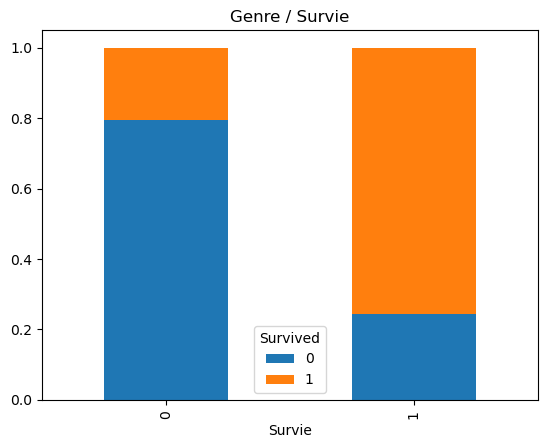

In [20]:

table = pd.crosstab(df.Sex, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '%Survie')

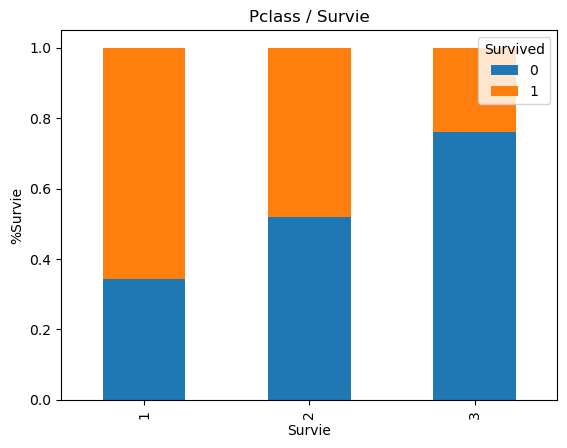

In [21]:

table = pd.crosstab(df.Pclass, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Pclass / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '')

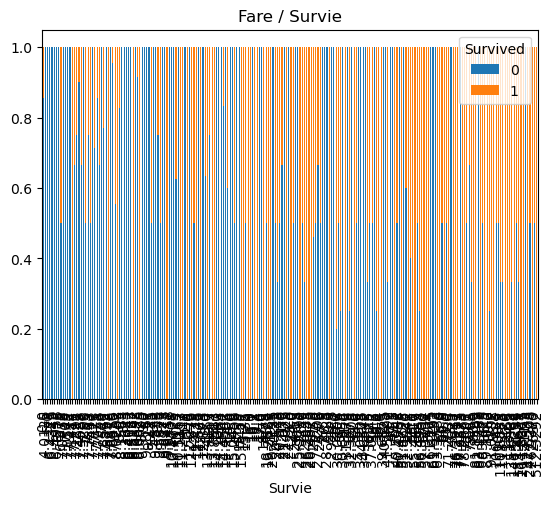

In [22]:

table = pd.crosstab(df.Fare, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')


In [23]:

df['FareGroup'] = pd.qcut(df['Fare'], 3)
df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)


,FareGroup,Survived
0,"(-0.001, 10.462]",0.196653
1,"(10.462, 26.55]",0.460581
2,"(26.55, 512.329]",0.564103


Text(0, 0.5, '')

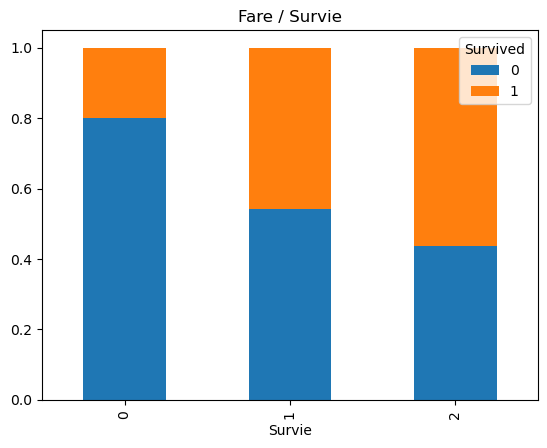

In [24]:

df.loc[df['Fare'] <= 10.462, 'Fare'] = 0
df.loc[(df['Fare'] > 10.462) & (df['Fare'] <= 26.55), 'Fare'] = 1
df.loc[df['Fare'] > 26.55, 'Fare'] = 2

df['Fare'] = df['Fare'].astype(int)

df.drop('FareGroup', axis=1, inplace=True)

table = pd.crosstab(df.Fare, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '')

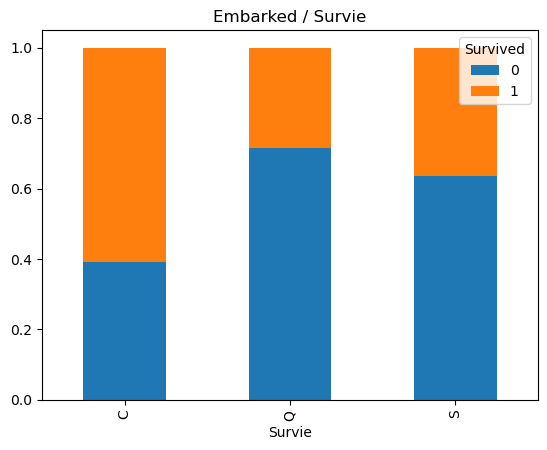

In [25]:

table = pd.crosstab(df.Embarked, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Embarked / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '')

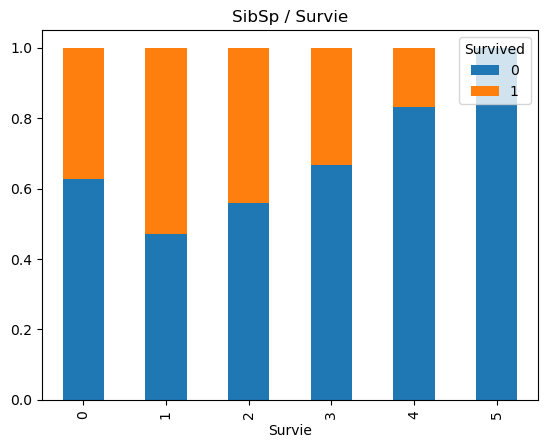

In [26]:

table = pd.crosstab(df.SibSp, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '')

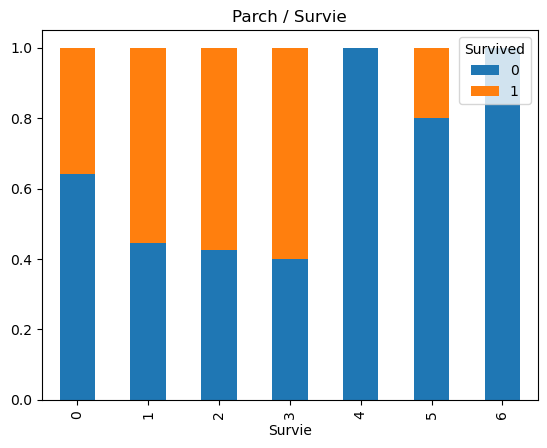

In [27]:

table = pd.crosstab(df.Parch, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')


Text(0, 0.5, '')

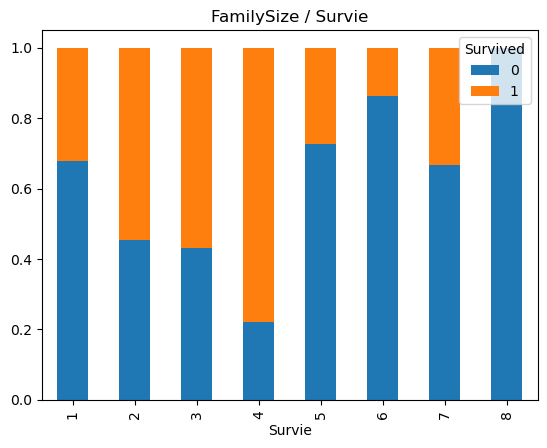

In [29]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

table = pd.crosstab(df.FamilySize, df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')


In [ ]:

# second sort

df.drop(['SibSp', 'Parch'], axis='columns', inplace=True)


In [35]:

# setup features && target 
X = df.drop('Survived', axis='columns')
y = df.Survived

print(X.head())
X.shape


   Pclass  Sex  Age  Fare Embarked  FamilySize
0       3    0    1     0        S           2
1       1    1    2     2        C           2
2       3    1    1     0        S           1
3       1    1    2     2        S           2
4       3    0    2     0        S           1


(714, 6)

In [37]:

X.tail()


,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,2,2,Q,6
886,2,0,1,1,S,1
887,1,1,1,2,S,1
889,1,0,1,2,C,1
890,3,0,1,0,Q,1


In [38]:

# adjustment of features 

X.drop(['Embarked', 'Pclass'], axis=1, inplace=True)

print(X.head())


   Sex  Age  Fare  FamilySize
0    0    1     0           2
1    1    2     2           2
2    1    1     0           1
3    1    2     2           2
4    0    2     0           1


In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

random_forest = RandomForestClassifier()

parameters = { 'n_estimators': [3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10] }

grid = GridSearchCV(random_forest, parameters, scoring=acc_scorer, cv=3)
grid = grid.fit(X_train, y_train)

print(grid.best_estimator_)

clf = grid.best_estimator_

# fit the best algorithm to the data

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(clf.score(X, y))



RandomForestClassifier(max_depth=5, n_estimators=5)
0.8336673346693386
0.8093023255813954
0.8263305322128851
